In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 78% 128M/163M [00:00<00:00, 1.34GB/s]
100% 163M/163M [00:00<00:00, 1.22GB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3241.jpg', 'with_mask_344.jpg', 'with_mask_1061.jpg', 'with_mask_3686.jpg', 'with_mask_2402.jpg']
['with_mask_1438.jpg', 'with_mask_2054.jpg', 'with_mask_1519.jpg', 'with_mask_1291.jpg', 'with_mask_3701.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2144.jpg', 'without_mask_3409.jpg', 'without_mask_1601.jpg', 'without_mask_560.jpg', 'without_mask_1460.jpg']
['without_mask_3295.jpg', 'without_mask_238.jpg', 'without_mask_3729.jpg', 'without_mask_396.jpg', 'without_mask_269.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


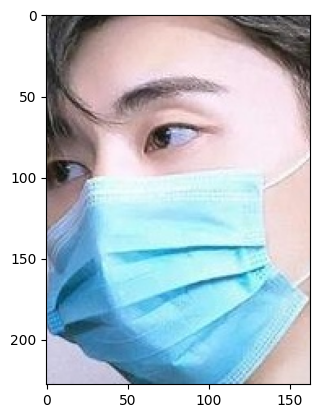

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

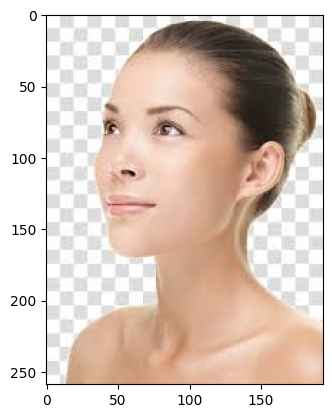

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[216, 219, 228],
        [216, 219, 228],
        [216, 219, 228],
        ...,
        [218, 218, 228],
        [218, 218, 228],
        [218, 218, 228]],

       [[216, 219, 228],
        [216, 219, 228],
        [216, 219, 228],
        ...,
        [218, 218, 228],
        [218, 218, 228],
        [218, 218, 228]],

       [[216, 219, 228],
        [216, 219, 228],
        [216, 219, 228],
        ...,
        [218, 218, 228],
        [218, 218, 228],
        [218, 218, 228]],

       ...,

       [[204, 207, 216],
        [205, 208, 217],
        [206, 209, 218],
        ...,
        [202, 205, 214],
        [202, 205, 214],
        [202, 205, 214]],

       [[203, 206, 215],
        [203, 206, 215],
        [204, 207, 216],
        ...,
        [202, 205, 214],
        [202, 205, 214],
        [202, 205, 214]],

       [[202, 205, 214],
        [203, 206, 215],
        [203, 206, 215],
        ...,
        [202, 205, 214],
        [202, 205, 214],
        [202, 205, 214]]], dtype=uint8)
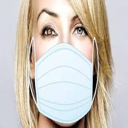

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765],
        ...,
        [0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765]],

       [[0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765],
        ...,
        [0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765]],

       [[0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765],
        ...,
        [0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765]],

       ...,

       [[0.8       , 0.81176471, 0.84705882],
        [0.80392157, 0.81568627, 0.85098039],
        [0.80784314, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - acc: 0.7413 - loss: 0.5765 - val_acc: 0.8777 - val_loss: 0.2964
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - acc: 0.8851 - loss: 0.2920 - val_acc: 0.9008 - val_loss: 0.2458
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9078 - loss: 0.2500 - val_acc: 0.9256 - val_loss: 0.2218
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9161 - loss: 0.2239 - val_acc: 0.9388 - val_loss: 0.1993
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9430 - loss: 0.1526 - val_acc: 0.9207 - val_loss: 0.2217


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9200 - loss: 0.2265
Test Accuracy = 0.9252150654792786


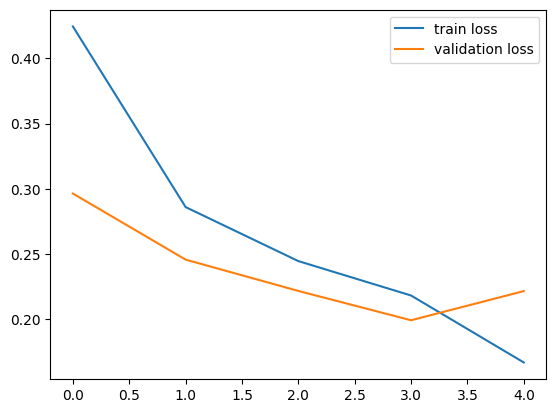

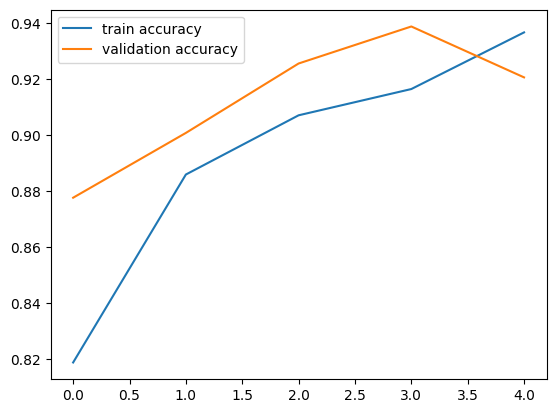

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1119.jpg


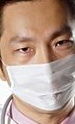

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
[[0.50706744 0.54192805]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


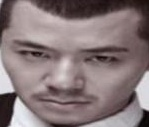

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.55447626 0.46888375]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')